# IMPORTANT !! If this is lauched for the first time in the session, without being launched from a specific EPFL server,
#specially prepared (with the adapted packages), this file will not be able to run. 
#To make it run, it will have to install the following package before the first launch (to be runned in code mode, which....
#... can be changed above, in the choose box). Once it is done, this cell can be set as "Markdown" (same place as code mode).
#This will change it in such a way that it will not install the packages everytime. The slideshow mode can be accesible by clicking on the diagram button, once the packages are installed (the slide show requires one of the packages). 

import sys
!conda install --yes --prefix {sys.prefix} numpy
!conda install --yes --prefix {sys.prefix} matplotlib
!conda install --yes --prefix {sys.prefix} ipywidgets
!conda install --yes --prefix {sys.prefix} bokeh
!conda install --yes --prefix {sys.prefix} -c conda-forge rise

# The Couette Flow

Before we start, we import some preliminary libraries. We will also import (below) the accompanying `Couette.py` file, which contains the actual solver and plotting routine.


In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

We will observe the situation of the Couette Flux.
The Couette's flow situation can be observed when a fluid is trapped between two plates, one being fixed and the other between moving at a constant speed (see picture) and it shows the steady-state (no temporal evolution => t=$\infty$)

Let's begin with some questions (using your smartphone, please connect at :)




Loading BokehJS ...

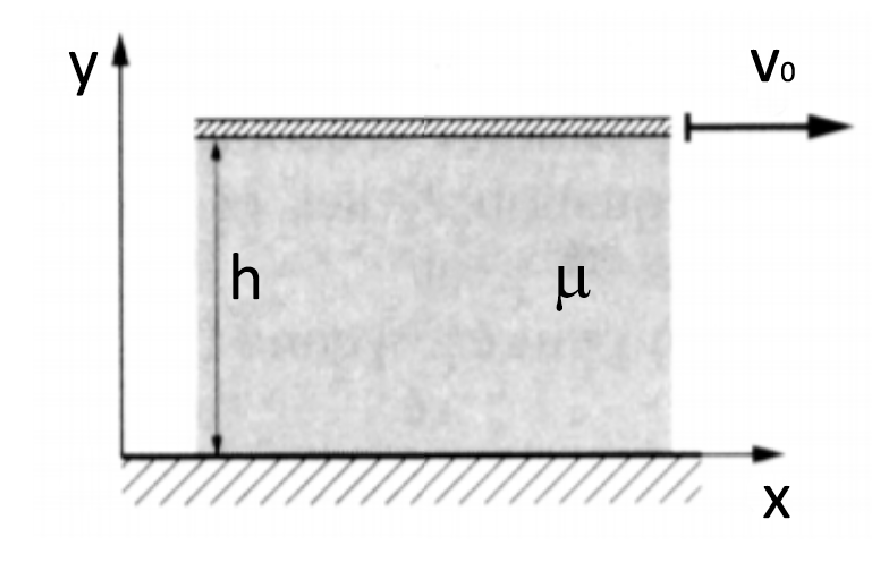

In [2]:
from ipywidgets import interact, fixed
import numpy as np
from bokeh.models import ColumnDataSource, Line, LinearAxis, Range1d, Label
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure, show, output_notebook
from bokeh.core.properties import value

output_notebook()
import matplotlib.pyplot as plt
from Couette2 import plot_img
plot_img("Couette.png")

 As we can see on the figure, the velocity is dependant on the y axis. Indeed, due to the no-slip condition, the fluid will move at the same speed as the plates, at the touching point. Between the plates, the velocity of the fluid is evolving linearly. Note that this at steady-state, and all the transient velocities have vanished.

From a mathematical point of view, one can determine the equation by solving the Navier-Stokes equation, once we introduced all the boundary conditions and the caracteristics of our problem (stationnary, one dimention evolution, etc...)
Once it is done, we end up with the differential equation :

\begin{align}
\mu\frac{d^2 v}{dy^2} &=0 \\ 
& => \mu\frac{d v}{dy} =C \\
& => v(y) =v_0*\frac{y}{h}    \textrm{(  using the boudary condition)}\\
\end{align}


## Interactive figure


Let's change v_0, with slider and examine the trajectories. 

In [4]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
h=3
v0=5
x0=30
p = figure(title="Simple Couette flow", plot_height=450, plot_width=900, y_range=(-0.5,10),x_range=(-0.5, 60) ,
           background_fill_color='#efefef')
b = p.line([0, 60], [0,0], line_color="green", line_width=1.5, alpha=1, legend="Lower fixed plate")
t = p.line([0, 60], [h,h], line_color="blue", line_width=1.5, alpha=1, legend="Upper moving plate")

arrow=p.line([0, 2*np.pi], [0,h], line_color="red", line_width=1.5, alpha=1, legend="Velocity formation")
line=p.line([2, 2], [0,h], line_color="orange", line_width=2, alpha=0.4, legend="Line of velocity = 0", line_dash=[4, 4])
def update(h=3, v0=4):
    t.data_source.data['y'] = [h, h]
    arrow.data_source.data['x']=[x0, x0+v0]
    arrow.data_source.data['y']=[0,h]
    line.data_source.data['x']=[x0, x0]
    line.data_source.data['y']=[0,h]
    push_notebook()

show(p, notebook_handle=True)

interact(update,  h=(0.1, 6.0), v0=(-29.0, 29.0));


interactive(children=(FloatSlider(value=3.0, description='h', max=6.0, min=0.1), FloatSlider(value=4.0, descri…

# Poiseuille flow

In [6]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

The parallel Poiseuille flow represents the velocity profil of the flow created by a pressure gradient between two parallel and static plates, in a stationnary situation (steady state => t=$\infty$). 

Try to think at a profil which is coherent with the condition that we have.

-What is the velocity at the boundaries?

-Where is the maximum?

-What shape has the profil ?

-Is the viscosity a parameter of this flow at steady state?

Let's answer some question on the clickers

Below, a model can be seen (Poiseuille flow). 

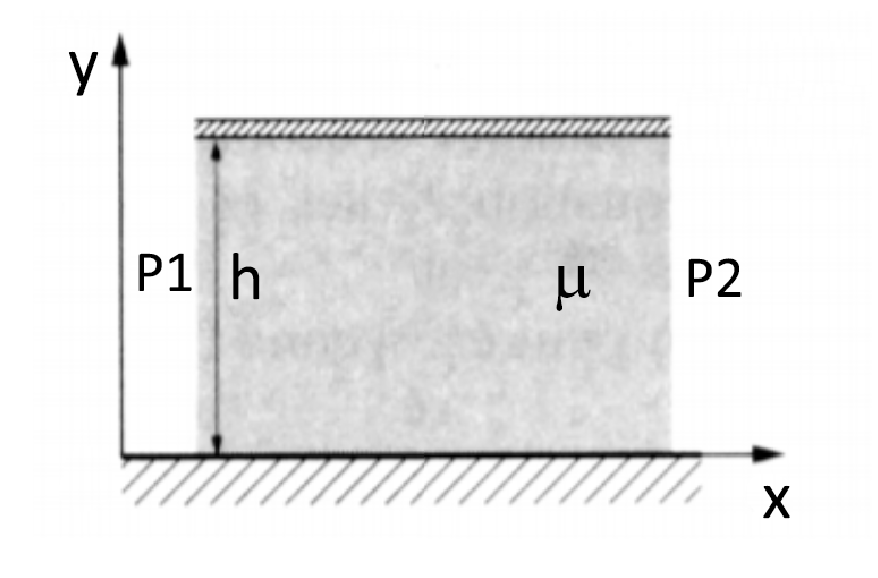

In [4]:
plot_img("Poiseuille.png")

### History

(Source Wikipedia : "https://en.wikipedia.org/wiki/Hagen%E2%80%93Poiseuille_equation")

In nonideal fluid dynamics, the Hagen–Poiseuille equation, also known as the Hagen–Poiseuille law, Poiseuille law or Poiseuille equation, is a physical law that gives the pressure drop in an incompressible and Newtonian fluid in laminar flow flowing through a long cylindrical pipe of constant cross section. It can be successfully applied to air flow in lung alveoli, or the flow through a drinking straw or through a hypodermic needle. It was experimentally derived independently by Jean Léonard Marie Poiseuille in 1838[1] and Gotthilf Heinrich Ludwig Hagen,[2] and published by Poiseuille in 1840–41 and 1846.[1]

The assumptions of the equation are that the fluid is incompressible and Newtonian; the flow is laminar between tow parallel plates, which a length that is substantially longer than the space between the plates; and there is no acceleration of fluid in the pipe. For velocities and pipe diameters above a certain wthreshold, actual fluid flow is not laminar but turbulent, leading to larger pressure drops than calculated by the Hagen–Poiseuille equation.

### Equation

[source : https://en.wikipedia.org/wiki/Hagen%E2%80%93Poiseuille_equation] From this pressure drop one can determine the velocity profil, using the Navier-Stokes equation and reducing it using the boundary condition (incompressible, unidirectional and non-slip condition (u(0)=0, u(h)=0), we end up with the equation :
\begin{equation}
\frac{d^2 u}{dy^2}=\frac{dp}{dx}\frac{1}{\mu}
\end{equation}
Once we intergrate this equation twice and respecting the boundary condition, we have the final velocity profil :
\begin{equation}
u(y)=\frac{dp}{dx}\frac{1}{2\mu}y(y-h)
\end{equation}

In the following interactive figure, you can change the pression on both of side of the figure, as well as the distance between the plates.

### Video (not keep)

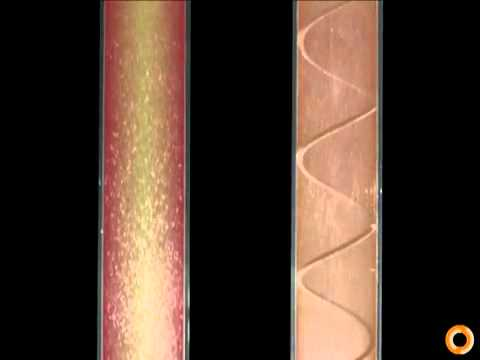

In [4]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('74nSN0LS1AU', width=720, height=480)

### Interactive figure

In [11]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [5]:
x0=30
dp=-20
nu=4
xp=[]
yp=[]
r=100
x1=[]
x2=[]
v_max=dp/(2*nu)
for i in np.arange(0, 1+1/r, 1/r):
    xp=np.append(xp,x0+v_max*((i*h)*((i*h)-h)))
    yp=np.append(yp,h*i)
data_source = ColumnDataSource(
data=dict(
    x1=xp,
    x2=yp,
)
)
p = figure(title="Simple Poiseuille flow", plot_height=450, plot_width=900, y_range=(-0.5,10),x_range=(-0.5, 60) ,
           background_fill_color='#efefef')
t = p.line([0, 60], [h,h], line_color="blue", line_width=1.5, alpha=1, legend="Upper fixed plate")
b = p.line([0, 60], [0,0], line_color="green", line_width=1.5, alpha=1, legend="Lower fixed plate")


line=p.line([x0, x0], [0,h], line_color="orange", line_width=1.5, alpha=0.4, legend="Line of velocity = 0")

vel1=p.line("x1","x2", line_color="red", source=data_source, legend="velocity front")

mytextp1 = Label(x=2, y=h/2, text='p1')
mytextp2 = Label(x=58, y=h/2, text='p2')
p.add_layout(mytextp1)
p.add_layout(mytextp2)




def update(h=3, dp=4, nu=4):
    #calcul of the points:
    xp=[]
    yp=[]
    r=100
    v_max=dp/(2*nu)
    for i in np.arange(0, 1+1/r, 1/r):
        xp=np.append(xp,x0+v_max*((i*h)*((i*h)-h)))
        yp=np.append(yp,h*i)
    
    vel1.data_source.data = {'x1': xp,
                       'x2': yp}
    t.data_source.data['y'] = [h, h]
    
    line.data_source.data['x']=[x0, x0]
    line.data_source.data['y']=[0,h]
    push_notebook()

show(p, notebook_handle=True)

interact(update,  h=(0.1, 8.0), dp=(-20.0, 20.0), nu=(0.5, 10));

interactive(children=(FloatSlider(value=3.0, description='h', max=8.0, min=0.1), FloatSlider(value=4.0, descri…

### Couette-Poiseuille

In [13]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

From these flows, one can determine a new one, which is the superposition of the Couette flow and the Poiseuille flow. (one wall is moving, and a pressure gradient is on the flow) 
Before interacting with the figure, please answer the following questions, using only your intuition, improved (hopefully) by the previous figures.

-Is the viscosity a parameter ?

-Can the fluid go in both direction ?

-What happens if both of the plates move ?

-Where is the maximum velocity? Is it constant ?

In [6]:


v0=3
x0=30
dp=-20
nu=4
xp=[]
yp=[]
r=100
x1=[]
x2=[]
v_max=dp/(2*nu)
for i in np.arange(0, 1+1/r, 1/r):
    xp=np.append(xp,x0+v_max*((i*h)*((i*h)-h))+v0*i)
    yp=np.append(yp,h*i)
data_source = ColumnDataSource(data=dict(x1=xp,x2=yp,))
p = figure(title="Poiseuille and Couette flow", plot_height=450, plot_width=900, y_range=(-0.5,10),x_range=(-0.5, 60) ,
           background_fill_color='#efefef')
b = p.line([0, 60], [0,0], line_color="green", line_width=1.5, alpha=1, legend="Lower fixed plate")
t = p.line([0, 60], [h,h], line_color="blue", line_width=1.5, alpha=1, legend="Upper moving plate")
line=p.line([x0, x0], [0,h], line_color="orange", line_width=1.5, alpha=0.4, legend="Line of velocity = 0")
vel1=p.line("x1","x2", line_color="red", source=data_source, legend="velocity front")

mytextp1 = Label(x=2, y=h/2, text='p1')
mytextp2 = Label(x=58, y=h/2, text='p2')
p.add_layout(mytextp1)
p.add_layout(mytextp2)


def update(h=3, dp=4, nu=4, v0=3):
    #calcul of the points:
    xp=[]
    yp=[]
    r=100
    v_max=dp/(2*nu)
    for i in np.arange(0, 1+1/r, 1/r):
        xp=np.append(xp,x0+v_max*((i*h)*((i*h)-h))+v0*i)
        yp=np.append(yp,h*i)
    
    vel1.data_source.data = {'x1': xp,
                       'x2': yp}
    t.data_source.data['y'] = [h, h]
    
    line.data_source.data['x']=[x0, x0]
    line.data_source.data['y']=[0,h]
    push_notebook()

show(p, notebook_handle=True)

interact(update,  h=(0.1, 8.0), dp=(-20.0, 20.0), nu=(0.5, 10), v0=(-10, 10));

interactive(children=(FloatSlider(value=3.0, description='h', max=8.0, min=0.1), FloatSlider(value=4.0, descri…